In [23]:
import seaborn as sns
import pandas as pd
import os

# music imports
import librosa
import resampy
import sys
import librosa.display

# keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

#scikit learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 1. LOAD DATASET

In [24]:
train_csv=pd.read_csv('TRAIN.CSV')
train_audio='TRAIN'
test_audio='TEST'

# DATA PREPROCESSING

In [28]:
import numpy as np
import librosa
import os

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, sr=None)

    mfccs = librosa.feature.mfcc(
        y=audio,
        sr=sample_rate,
        n_mfcc=40
    )

    return np.mean(mfccs, axis=1)


features = []
labels = []

for index, row in train_csv.iterrows():
    file_path = os.path.join(train_audio, row['Filename'])
    data = extract_features(file_path)
    features.append(data)
    labels.append(row['Class'])


In [30]:
labels[:5]

['Negative', 'Neutral', 'Negative', 'Negative', 'Negative']

# AUDIO EDA

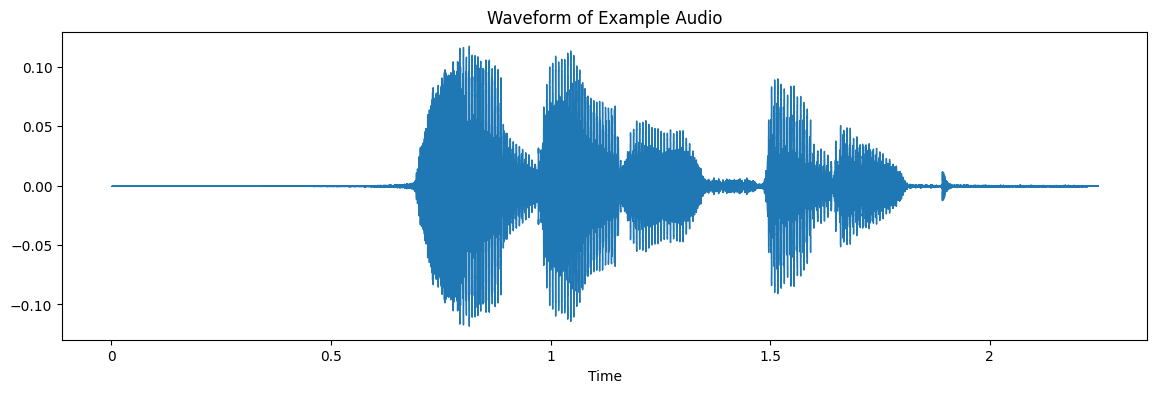

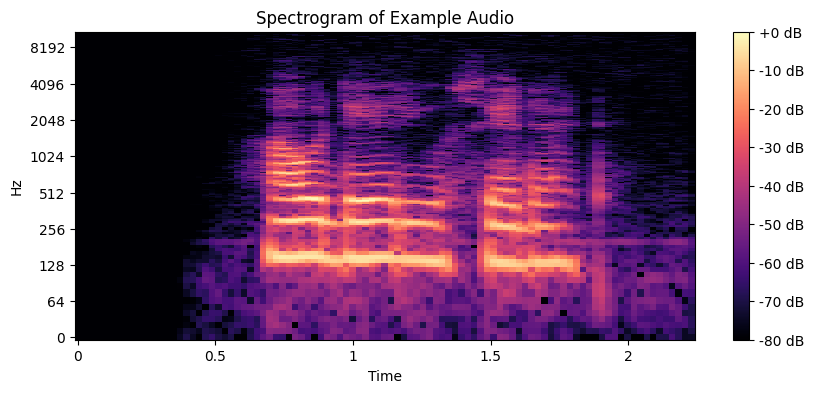

In [33]:

# Example Audio Visualization
import matplotlib.pyplot as plt
example_audio = os.path.join(train_audio, train_csv['Filename'].iloc[0])
audio, sr = librosa.load(example_audio)

# Waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform of Example Audio')
plt.show()

# Spectrogram
plt.figure(figsize=(10, 4))
spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Example Audio')
plt.show()

# train_test_split

In [34]:
X = np.array(features)
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train

array([[ 4.5838229e+02,  1.1171288e+02,  2.1409332e+01, ...,
        -1.2465360e+00, -1.5450526e+00, -2.5223410e+00],
       [-5.8225018e+02,  9.7550682e+01,  1.2115911e+01, ...,
        -1.7263323e+00, -7.0675915e-01, -9.7099924e-01],
       [ 6.1441504e+02,  1.3120493e+02, -3.9891043e+00, ...,
        -1.7701603e+00, -1.2408028e+00, -2.8764286e+00],
       ...,
       [ 4.4090149e+02,  1.0362594e+02,  1.7095989e+01, ...,
         5.0382003e-02, -2.0942168e+00, -3.7586930e+00],
       [ 4.2885535e+02,  1.1001200e+02,  3.7597996e+01, ...,
        -1.5802725e-01, -1.0751230e+00, -2.9050937e+00],
       [ 4.7445987e+02,  1.0896310e+02,  1.6372751e+01, ...,
         1.8989365e+00, -3.8391783e+00, -2.3413846e+00]], dtype=float32)

## BUILDING CNN FOR AUDIO SENTIMENT

In [37]:
# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], 40, 1, 1)
X_val = X_val.reshape(X_val.shape[0], 40, 1, 1)

# CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(40, 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.3250 - loss: 9.8308 - val_accuracy: 0.4800 - val_loss: 2.9011
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4200 - loss: 5.3611 - val_accuracy: 0.6000 - val_loss: 2.1640
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5050 - loss: 3.7900 - val_accuracy: 0.7800 - val_loss: 1.1751
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6150 - loss: 1.5366 - val_accuracy: 0.8800 - val_loss: 0.3342
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6400 - loss: 1.0168 - val_accuracy: 0.8800 - val_loss: 0.2982
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6950 - loss: 0.5859 - val_accuracy: 0.8200 - val_loss: 0.3666
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7600 - loss: 0.5337 - val_accuracy: 0.8600 - val_loss: 0.3602
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7700 - loss: 0.4765 - val_accuracy: 0.9000 - val_loss: 0.2898

# EVALUATION

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9400 - loss: 0.2638
Validation Loss: 0.2638
Validation Accuracy: 0.9400
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      1.00      0.91        15
     Neutral       1.00      1.00      1.00        20
    Positive       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.93        50
weighted avg       0.95      0.94      0.94        50



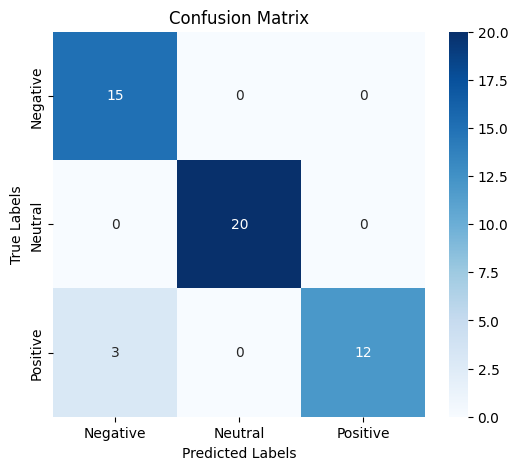

In [38]:

# Evaluate the Model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Predict Classes
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification Report 📊
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Confusion Matrix 📉
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# PREDICTION SYSTEM

In [39]:

import numpy as np
import librosa
from IPython.display import Audio  # For playing audio

# Detection System
def predict_sentiment(audio_path):
    feature = extract_features(audio_path)         # Extract MFCC features
    feature = feature.reshape(1, 40, 1, 1)         # Reshape for CNN input
    prediction = model.predict(feature)            # Predict sentiment
    predicted_label = le.inverse_transform([np.argmax(prediction)])[0]
    return predicted_label

In [42]:

# Test Audio Path
audio_path = 'TEST/7.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
🎯 Predicted Sentiment: Positive


In [43]:
# Test Audio Path
audio_path = 'TEST/13.wav'

# Play the Audio 🎧
display(Audio(audio_path))

# Predict Sentiment 🚀
predicted_label = predict_sentiment(audio_path)
print(f"🎯 Predicted Sentiment: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
🎯 Predicted Sentiment: Positive


# SAVE FILES

In [45]:

import joblib

# Save the trained model
model.save('sentiment_cnn_model.h5')

# Save the Label Encoder
joblib.dump(le, open('label_encoder.pkl','wb'))